In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
data_train_orig = np.loadtxt('data/u1.base',dtype = np.int64)
data_test_orig = np.loadtxt('data/u1.test',dtype=np.int64)

data_train_orig[:,0]-=1
data_train_orig[:,1]-=1
data_test_orig[:,0]-=1
data_test_orig[:,1]-=1


n_users = 943
n_items = 1682
print(n_users,n_items)

R = np.zeros((n_users,n_items))
for i in range(data_train_orig.shape[0]):
    R[data_train_orig[i][0]][data_train_orig[i][1]]=data_train_orig[i][2]


943 1682


In [3]:
K = 2
P = np.random.rand(n_users,K)
Q = np.random.rand(n_items,K)

In [4]:
def validation_loss(P,Q, lambda_p, lambda_q):
    R_val = np.zeros((n_users,n_items))
    m = data_test_orig.shape[0]
    for i in range(m):
        R_val[data_test_orig[i][0]][data_test_orig[i][1]]=data_test_orig[i][2]
        
    n_pu = np.sum(R_val>0,axis = 1)
    n_qi = np.sum(R_val>0,axis = 0)
    loss = np.sum(np.square(R_val - np.dot(P,Q.T))) \
                + lambda_p * np.sum(n_pu * np.sum(np.square(P), axis=1)) \
                + lambda_q * np.sum(n_qi * np.sum(np.square(Q), axis=1))
    return loss/m

In [5]:
def train(P,Q,R,learning_rate = 0.01, lambda_p = 30, lambda_q = 30, max_iterations = 1000):
    
    P = np.random.rand(n_users,K)
    Q = np.random.rand(n_items,K)

    val_loss_log = []
    
    m = data_train_orig.shape[0]
    
    for iterations in range(max_iterations):
        it = iterations%m
        u = data_train_orig[it][0]
        i = data_train_orig[it][1]
        r = data_train_orig[it][2]
        assert R[u,i]==r
        E = r - np.dot(P[u],Q[i])

        if iterations%100==0:
            loss = np.square(r-np.dot(P[u],Q[i])) + lambda_p * np.sum(np.square(P[u])) + lambda_q * np.sum(np.square(Q[i]))
            val_loss = validation_loss(P,Q,lambda_p,lambda_q)
            val_loss_log.append(val_loss)
            print(iterations,loss,val_loss)


        gp = E*(-Q[i])+lambda_p*P[u]
        gq = E*(-P[u])+lambda_q*Q[i]
        P[u] = P[u] - learning_rate * gp
        Q[i] = Q[i] - learning_rate * gq
        
    return val_loss_log
        

In [6]:
val_loss = train(P,Q,R,learning_rate=0.1,lambda_p = 10, lambda_q = 10,max_iterations = 50000)

0 29.7735326158 51.3713221557
100 18.9909828022 49.1530959786
200 16.8800780221 47.2366490722
300 20.1330349368 45.6989223517
400 24.7002874109 44.7724600192
500 30.7788914576 43.5726851756
600 24.5204910647 42.3269067951
700 25.0075972402 41.046801182
800 9.01032948617 40.565051575
900 4.90247870005 39.5983706048
1000 9.08949166716 39.2320545973
1100 5.41013479535 38.7235975686
1200 5.46145773337 37.6914320177
1300 16.0159295641 36.372821565
1400 25.0769451524 35.8460215318
1500 9.00606661848 35.5454652642
1600 9.86828683847 35.3260787719
1700 1.00162579035 34.8386085705
1800 9.00046217147 34.3546152565
1900 16.0312453188 34.0915333295
2000 16.0009062418 33.9555240256
2100 16.0052942434 33.8309804951
2200 16.0025674449 33.5774994363
2300 25.0000011969 33.34403018
2400 16.0000000005 32.9767214266
2500 25.7220162953 32.7221625888
2600 16.4405158215 32.6779817638
2700 9.00000114489 32.5010763439
2800 1.0 32.1799509288
2900 25.0000098056 31.8187661219
3000 16.0000100633 31.6510337551
3100

29400 9.00000085039 15.8395753221
29500 25.0 15.8395836215
29600 25.0000000009 15.8395836236
29700 9.0 15.817592832
29800 9.0 15.8159760236
29900 16.0 15.8223003581
30000 4.0 15.7926336032
30100 16.0 15.742668718
30200 1.0 15.7430212744
30300 16.000040697 15.6773215216
30400 25.0 15.6770602339
30500 4.0 15.6690251267
30600 9.0 15.6690251267
30700 9.0 15.6690251268
30800 16.0 15.6555671088
30900 16.0 15.6587656329
31000 25.0 15.6587656864
31100 4.0 15.6162927151
31200 9.0 15.6162488205
31300 9.0 15.6003074502
31400 4.0 15.600313954
31500 9.0 15.5836968954
31600 16.0 15.5836985306
31700 9.0 15.5773652569
31800 16.0 15.577365265
31900 4.0 15.5667332597
32000 9.0 15.5667333101
32100 16.0 15.5667333101
32200 16.0 15.5662908368
32300 4.0000000001 15.5641251061
32400 9.0 15.5641251376
32500 1.0 15.5650890997
32600 16.0 15.5629510201
32700 16.0 15.5395579826
32800 1.14781000175 15.5293878169
32900 31.2839718084 15.5271219892
33000 9.0 15.5154946377
33100 16.0 15.516637167
33200 25.0 15.5061933

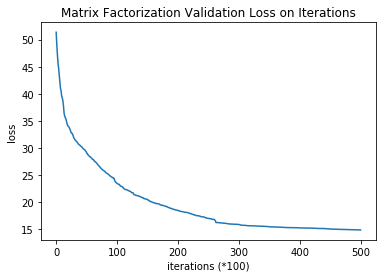

In [7]:
plt.plot(val_loss)
plt.title('Matrix Factorization Validation Loss on Iterations')
plt.xlabel('iterations (*100)')
plt.ylabel('loss')
# plt.show()

plt.savefig('report/loss.eps',format='eps',dpi=1000)